# READING DATA#

We load the CSV file in a dataframe data structure.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')

train.iloc[0][1] #to assess specific elements

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

# EXPLORING THE TRAINING SET

We save in the numerosity of each target class in the training set in a dictionary data structure and we plot the results. We add a class called 'non_offending' to label all the comments that are not considered offensive, i.e. that have all the six original labels set to 0.

In [122]:
i = 0
dic = {'toxic':0, 'severe_toxic':0, 'obscene':0, 'threat':0, 'insult':0, 'identity_hate':0, 'non_offending':0}
while i<len(train):
    flag = False
    for key in dic:
        if key != 'non_offending' and train.iloc[i][key]==1:
            dic[key]+=1
            flag = True
    if flag == False:
        dic['non_offending']+=1
    i+=1
print(dic)

{'severe_toxic': 1595, 'identity_hate': 1405, 'obscene': 8449, 'insult': 7877, 'threat': 478, 'toxic': 15294, 'non_offending': 143346}


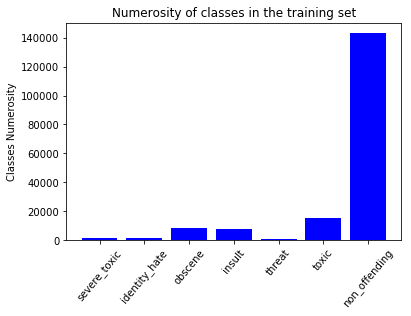

In [123]:
names = list(dic.keys())
values = list(dic.values())

plt.bar(range(1,8), values, color = 'b')
plt.title("Numerosity of classes in the training set")
plt.ylabel("Classes Numerosity")
plt.xticks(range(1,8),names, rotation=50)
plt.show()

The training set is strongly unbalanced, meaning that the numerosity of the target classes varies a lot: in particular, non-offending comments are much more frequent in the training set than all the other six classes. This may cause problems during the training of the algorithm, because the classifier is more likely to assign new examples to the most numerous classes in the training set, especially if we don't have "enough" examples for each class in the training set. 